In [1]:
import mlrose_hiive as mlrose
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time
import random as rn
import os
import time
%matplotlib inline

In [2]:
"""
Setting up seed values for reproducability
"""
starting_seed = 1234
seed_values = []

for i in range(0, 5):
    seed_values.append(starting_seed + i)

# np.random.seed(seed)
# rn.seed(seed)
# os.environ['PYTHONHASHSEED'] = str(seed)

In [3]:
"""
Defining custom maximization fitness function for N-Queens
"""

def queens_max(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # First condition is same row
            # Second condition is top right and bottom left diagonal
            # Third condition is top left and bottom right diagonal
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - 1)):
                fitness_cnt += 1
            
    return fitness_cnt

In [4]:
"""
Defining custom maximization fitness function for Four-Peaks
"""

threshold_percentage = 0.25
fitness_fourpeaks = mlrose.FourPeaks(t_pct = threshold_percentage)

In [5]:
"""
Defining custom maximization fitness function for Knapsack Problem
"""

weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness_knapsack = mlrose.Knapsack(weights, values, max_weight_pct)

# First run

Trying the different algorithms on the optimization problem with differing problem sizes before messing with the hyperparameters and the different iterations amounts.

In [6]:
"""
Main custom runner for the Four Peaks optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparamters RHC
max_attempts_rhc = 100
max_iters_rhc = np.inf
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100
max_iters_sa = np.inf

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100
max_iters_ga = np.inf

# Hyperparameters MIMIC
pop_size_mimic = 200
keep_pct = 0.2
max_attempts_mimic = 100
max_iters_mimic = np.inf
noise = 0.1

problem_sizes = [1 * i for i in range(0, 160, 10)]
problem_sizes.pop(0)

rhc_data_problem_sizes = []
sa_data_problem_sizes = []
ga_data_problem_sizes = []
mimic_data_problem_sizes = []

# Want to loop across the different problem sizes
for problem_size in problem_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running problem size {problem_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
#         print(f"Running problem size {problem_size} with seed {seed}...")
              
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_state = np.random.randint(2, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.FourPeaks(t_pct=0.25)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=max_iters_rhc,
            restarts=restarts,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=max_iters_sa,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=max_iters_ga,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_fitness)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=max_iters_mimic,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_fitness)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_problem_sizes.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_problem_sizes.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_problem_sizes.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_problem_sizes.append(mimic_avg)
    
    print("====================================================")


Running problem size 10!
RHC best avg fitness 11.2
SA best avg fitness 12.4
GA best avg fitness 16.0
MIMIC best avg fitness 16.0
Running problem size 20!
RHC best avg fitness 22.8
SA best avg fitness 28.4
GA best avg fitness 34.0
MIMIC best avg fitness 34.0
Running problem size 30!
RHC best avg fitness 30.0
SA best avg fitness 30.0
GA best avg fitness 51.0
MIMIC best avg fitness 50.2
Running problem size 40!
RHC best avg fitness 40.0
SA best avg fitness 39.6
GA best avg fitness 63.2
MIMIC best avg fitness 58.4
Running problem size 50!
RHC best avg fitness 50.0
SA best avg fitness 49.8
GA best avg fitness 78.8
MIMIC best avg fitness 51.8
Running problem size 60!
RHC best avg fitness 39.2
SA best avg fitness 59.4
GA best avg fitness 60.0
MIMIC best avg fitness 30.0
Running problem size 70!
RHC best avg fitness 23.6
SA best avg fitness 70.0
GA best avg fitness 70.0
MIMIC best avg fitness 28.8
Running problem size 80!
RHC best avg fitness 27.6
SA best avg fitness 79.6
GA best avg fitness 8

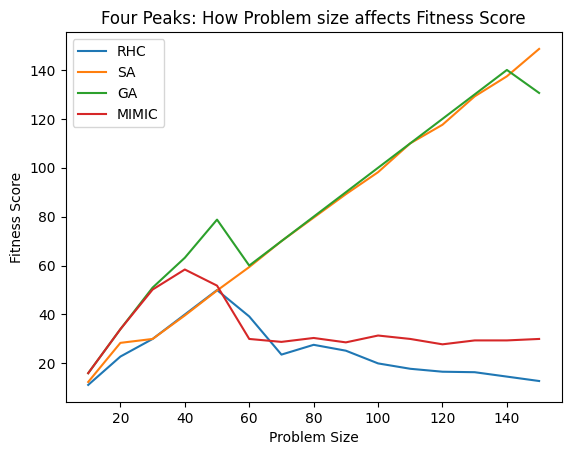

In [7]:
"""
Plotting the fitness score (Y axis) to problem size (X axis) for Four-Peaks
"""

plt.plot(problem_sizes, rhc_data_problem_sizes, label = 'RHC')
plt.plot(problem_sizes, sa_data_problem_sizes, label = 'SA')
plt.plot(problem_sizes, ga_data_problem_sizes, label = 'GA')
plt.plot(problem_sizes, mimic_data_problem_sizes, label = 'MIMIC')

plt.xlabel("Problem Size")
plt.ylabel("Fitness Score")
plt.title("Four Peaks: How Problem size affects Fitness Score")
plt.legend()
plt.show()

# Now trying with different iteration sizes with a fixed problem size

It seems that the difference between the curves happen when the problem size reaches around 60 bits. For this iteration we will set the problem size to 60 and try out different iteration sizes to see how it changes the fitness score.

In [8]:
"""
Main custom runner for the Four Peaks optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
problem_size = 60

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 200
keep_pct = 0.2
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 1000, 50)]
iteration_sizes.pop(0)

rhc_data_iteration_sizes = []
sa_data_iteration_sizes = []
ga_data_iteration_sizes = []
mimic_data_iteration_sizes = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_state = np.random.randint(2, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.FourPeaks(t_pct=0.25)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_fitness)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_fitness)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_iteration_sizes.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_iteration_sizes.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_iteration_sizes.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_iteration_sizes.append(mimic_avg)
    
    print("====================================================")


Running iteration size 50!
RHC best avg fitness 9.0
SA best avg fitness 2.4
GA best avg fitness 41.4
MIMIC best avg fitness 26.8
Running iteration size 100!
RHC best avg fitness 13.0
SA best avg fitness 2.8
GA best avg fitness 57.6
MIMIC best avg fitness 28.2
Running iteration size 150!
RHC best avg fitness 15.6
SA best avg fitness 4.0
GA best avg fitness 60.0
MIMIC best avg fitness 29.6
Running iteration size 200!
RHC best avg fitness 18.6
SA best avg fitness 4.2
GA best avg fitness 60.0
MIMIC best avg fitness 30.0
Running iteration size 250!
RHC best avg fitness 19.8
SA best avg fitness 5.6
GA best avg fitness 60.0
MIMIC best avg fitness 30.0
Running iteration size 300!
RHC best avg fitness 21.8
SA best avg fitness 9.6
GA best avg fitness 60.0
MIMIC best avg fitness 30.0
Running iteration size 350!
RHC best avg fitness 21.8
SA best avg fitness 12.8
GA best avg fitness 60.0
MIMIC best avg fitness 30.0
Running iteration size 400!
RHC best avg fitness 23.2
SA best avg fitness 13.2
GA be

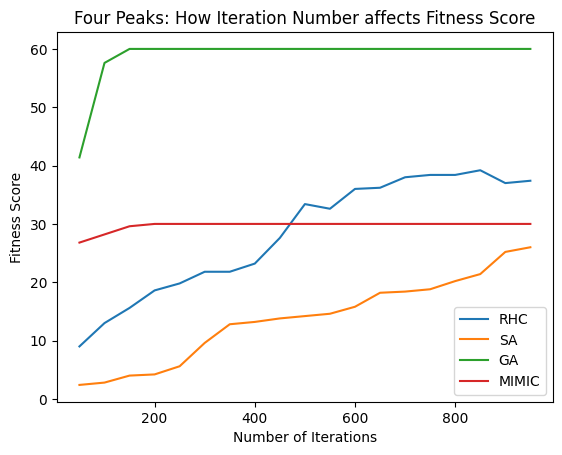

In [9]:
"""
Plotting the fitness score (Y axis) to iteration size (X axis) for Four-Peaks
"""

plt.plot(iteration_sizes, rhc_data_iteration_sizes, label = 'RHC')
plt.plot(iteration_sizes, sa_data_iteration_sizes, label = 'SA')
plt.plot(iteration_sizes, ga_data_iteration_sizes, label = 'GA')
plt.plot(iteration_sizes, mimic_data_iteration_sizes, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score")
plt.title("Four Peaks: How Iteration Number affects Fitness Score")
plt.legend()
plt.show()

# Generating the Number of FEvals with respect to Iterations

In [10]:
"""
Main custom runner for the Four Peaks optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
problem_size = 60

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 200
keep_pct = 0.2
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 1000, 50)]
iteration_sizes.pop(0)

rhc_data_fevals = []
sa_data_fevals = []
ga_data_fevals = []
mimic_data_fevals = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_state = np.random.randint(2, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.FourPeaks(t_pct=0.25)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_curve[-1][1])
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC FEvals {rhc_avg}")
    rhc_data_fevals.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA FEvals {sa_avg}")
    sa_data_fevals.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA FEvals {ga_avg}")
    ga_data_fevals.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC FEvals {mimic_avg}")
    mimic_data_fevals.append(mimic_avg)
    
    print("====================================================")


Running iteration size 50!
RHC FEvals 764.2
SA FEvals 99.6
GA FEvals 10266.2
MIMIC FEvals 10257.4
Running iteration size 100!
RHC FEvals 1713.4
SA FEvals 197.2
GA FEvals 20324.2
MIMIC FEvals 20308.2
Running iteration size 150!
RHC FEvals 1887.8
SA FEvals 294.4
GA FEvals 30375.6
MIMIC FEvals 28308.6
Running iteration size 200!
RHC FEvals 2365.8
SA FEvals 390.4
GA FEvals 40224.6
MIMIC FEvals 34097.8
Running iteration size 250!
RHC FEvals 2669.8
SA FEvals 485.2
GA FEvals 42073.8
MIMIC FEvals 36670.6
Running iteration size 300!
RHC FEvals 1859.4
SA FEvals 580.6
GA FEvals 42073.8
MIMIC FEvals 37916.8
Running iteration size 350!
RHC FEvals 2266.6
SA FEvals 671.2
GA FEvals 42073.8
MIMIC FEvals 37916.8
Running iteration size 400!
RHC FEvals 2082.0
SA FEvals 758.2
GA FEvals 42073.8
MIMIC FEvals 37916.8
Running iteration size 450!
RHC FEvals 3726.6
SA FEvals 847.4
GA FEvals 42073.8
MIMIC FEvals 37916.8
Running iteration size 500!
RHC FEvals 2421.0
SA FEvals 934.0
GA FEvals 42073.8
MIMIC FEvals 3

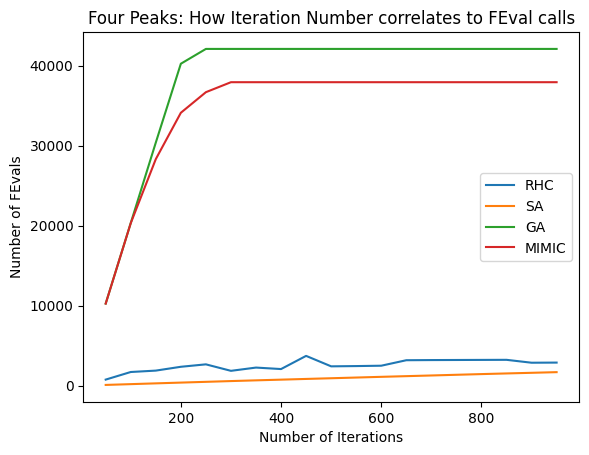

In [13]:
"""
Plotting the FEvals (Y axis) to iteration size (X axis) for Four-Peaks
"""

plt.plot(iteration_sizes, rhc_data_fevals, label = 'RHC')
plt.plot(iteration_sizes, sa_data_fevals, label = 'SA')
plt.plot(iteration_sizes, ga_data_fevals, label = 'GA')
plt.plot(iteration_sizes, mimic_data_fevals, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Number of FEvals")
plt.title("Four Peaks: How Iteration Number correlates to FEval calls")
plt.legend()
plt.show()

# Comparing the Wall Clock Times based off Iteration Number

In [14]:
"""
Main custom runner for the Four Peaks optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
problem_size = 60

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 200
keep_pct = 0.2
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 1000, 50)]
iteration_sizes.pop(0)

rhc_data_clock = []
sa_data_clock = []
ga_data_clock = []
mimic_data_clock = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_state = np.random.randint(2, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.FourPeaks(t_pct=0.25)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(end - start)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(end - start)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(end - start)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(end - start)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC clock {rhc_avg}")
    rhc_data_clock.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA clock {sa_avg}")
    sa_data_clock.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA clock {ga_avg}")
    ga_data_clock.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC clock {mimic_avg}")
    mimic_data_clock.append(mimic_avg)
    
    print("====================================================")


Running iteration size 50!
RHC clock 0.014914846420288086
SA clock 0.0010889530181884765
GA clock 0.40913987159729004
MIMIC clock 0.6702075481414795
Running iteration size 100!
RHC clock 0.027005863189697266
SA clock 0.0018948554992675782
GA clock 0.8789190769195556
MIMIC clock 1.3346739292144776
Running iteration size 150!
RHC clock 0.038784360885620116
SA clock 0.0029242992401123046
GA clock 1.3722637176513672
MIMIC clock 1.8426634311676025
Running iteration size 200!
RHC clock 0.048891210556030275
SA clock 0.003995132446289062
GA clock 1.837015438079834
MIMIC clock 2.1943299770355225
Running iteration size 250!
RHC clock 0.0577967643737793
SA clock 0.004851150512695313
GA clock 1.9297481060028077
MIMIC clock 2.3825247287750244
Running iteration size 300!
RHC clock 0.0634200096130371
SA clock 0.005931234359741211
GA clock 1.933971118927002
MIMIC clock 2.455329704284668
Running iteration size 350!
RHC clock 0.06593899726867676
SA clock 0.0069659709930419925
GA clock 1.9145716190338136

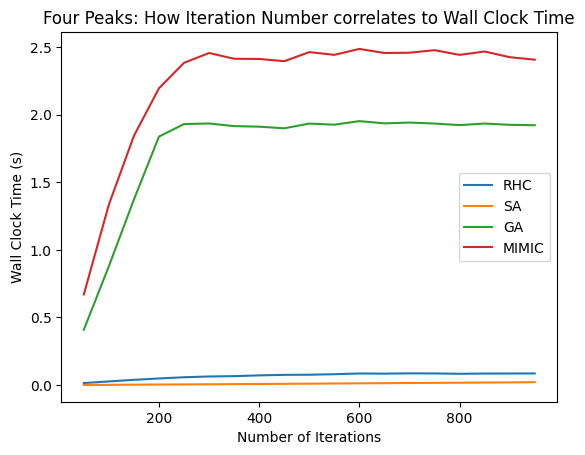

In [15]:
"""
Plotting the Wall Clock time (Y axis) to iteration size (X axis) for Four-Peaks
"""

plt.plot(iteration_sizes, rhc_data_clock, label = 'RHC')
plt.plot(iteration_sizes, sa_data_clock, label = 'SA')
plt.plot(iteration_sizes, ga_data_clock, label = 'GA')
plt.plot(iteration_sizes, mimic_data_clock, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Wall Clock Time (s)")
plt.title("Four Peaks: How Iteration Number correlates to Wall Clock Time")
plt.legend()
plt.show()

In [5]:
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize = False, max_val = 8)

In [6]:
schedule = mlrose.ExpDecay()

init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# max_attempts = 10
max_attempts = 100

best_state, best_fitness, best_curve = mlrose.simulated_annealing(problem, schedule = schedule, curve=True, max_attempts = max_attempts, max_iters = 1000, init_state=init_state, random_state = 1)

print(best_state)
print(best_fitness)
print(best_curve)

[4 2 0 6 1 7 5 3]
0.0
[[  23.    3.]
 [  18.    5.]
 [  15.    7.]
 ...
 [   0. 1044.]
 [   0. 1045.]
 [   0. 1046.]]


In [7]:
# TSP Example
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

fitness_coords = mlrose.TravellingSales(coords = coords_list)

In [8]:
problem_fit = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize = False)

In [9]:
best_state, best_fitness, _ = mlrose.genetic_alg(problem_fit, random_state = 2, max_attempts = 1, max_iters=1)

print(best_state)
print(best_fitness)

[7 6 5 4 3 1 2 0]
18.895804660363012


In [10]:
best_state, best_fitness, _ = mlrose.genetic_alg(problem_fit, random_state = 2, mutation_prob = 0.2, max_attempts = 100)

print(best_state)
print(best_fitness)

[5 6 7 0 1 2 3 4]
17.34261754766733


In [16]:
# Trying the Machine Learning Optimization
from sklearn.datasets import load_iris

data = load_iris()

print(data.data[0])

print(data.feature_names)

print(data.target[0])

print(data.target_names[data.target[0]])

print(np.min(data.data, axis = 0))

print(np.max(data.data, axis = 0))

print(np.unique(data.target))

[5.1 3.5 1.4 0.2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
0
setosa
[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]
[0 1 2]


In [17]:
# Data Preprocessing NN tutorial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, \
                                                    test_size = 0.2, random_state = 3)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

In [18]:
print(y_train[0])
print(y_train_hot[0])

0
[[1. 0. 0.]]


In [38]:
# Adding the NN from mlrose
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, early_stopping=True,
              hidden_nodes=[20], learning_rate=0.0001, max_attempts=100,
              max_iters=1000, random_state=3)

In [39]:
# Predicting / Testing the accuracy scores of the model
from sklearn.metrics import accuracy_score

y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
print(y_train_pred[0])

print(y_train_accuracy)

y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

[1 0 0]
0.9666666666666667
0.9666666666666667


In [40]:
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, early_stopping=True,
              hidden_nodes=[20], learning_rate=0.0001, max_attempts=100,
              max_iters=1000, random_state=3)

In [41]:
# Predicting / Accuracy scores 
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.9666666666666667
0.9666666666666667


In [17]:
experiment_name = "test"
problem = mlrose.QueensGenerator.generate(seed=1, size=20)

rhc = mlrose.RHCRunner(
    problem=problem,
    experiment_name=experiment_name,
    output_directory=None,
    seed=1,
    iteration_list=2 ** np.arange(10),
    max_attempts=100,
    restart_list=[25, 75, 100]
)

df_run_stats, df_run_curves = rhc.run()

In [22]:
df_run_stats[:50]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,17.0,0,0.001025,"[5, 11, 12, 8, 9, 11, 5, 15, 0, 16, 1, 12, 7, ...",25,512,0
1,1,17.0,1,0.003807,"[5, 11, 12, 8, 9, 11, 5, 15, 0, 16, 1, 12, 7, ...",25,512,0
2,2,17.0,2,0.005279,"[5, 11, 12, 8, 9, 11, 5, 15, 0, 16, 1, 12, 7, ...",25,512,0
3,4,16.0,5,0.007455,"[5, 11, 12, 8, 9, 11, 5, 15, 0, 16, 1, 12, 7, ...",25,512,0
4,8,16.0,9,0.010029,"[5, 11, 12, 8, 9, 11, 5, 15, 0, 16, 1, 12, 7, ...",25,512,0
5,16,11.0,20,0.015390,"[5, 11, 12, 4, 9, 11, 18, 15, 0, 16, 1, 12, 7,...",25,512,0
6,32,8.0,39,0.024127,"[4, 11, 13, 4, 9, 11, 18, 15, 1, 16, 1, 12, 7,...",25,512,0
7,64,4.0,75,0.040821,"[14, 11, 13, 4, 9, 11, 2, 15, 1, 16, 0, 12, 7,...",25,512,0
8,128,3.0,140,0.070528,"[14, 11, 13, 4, 9, 11, 2, 15, 1, 16, 0, 12, 7,...",25,512,0
9,256,3.0,182,0.091769,"[14, 11, 13, 4, 9, 11, 2, 15, 1, 16, 0, 12, 7,...",25,512,0


In [19]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.001025,17.0,0.0,25,512,0
1,1,0.003807,17.0,1.0,25,512,0
2,2,0.005279,17.0,2.0,25,512,0
3,3,0.007030,16.0,4.0,25,512,0
4,4,0.007455,16.0,5.0,25,512,0
...,...,...,...,...,...,...,...
51568,236,0.138825,4.0,26909.0,100,512,100
51569,237,0.139354,4.0,26910.0,100,512,100
51570,238,0.139875,4.0,26911.0,100,512,100
51571,239,0.140411,4.0,26912.0,100,512,100
